In [45]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch import nn
import numpy as np

In [2]:
class cnnEvalModel():
    def __init__(self, modelFilePath):

        self.images = None
        self.labels = None
        self.logps = None
        self.output = None
        self.pred = None
        self.img = None
        self.imgOut = None

        # torch.manual_seed(0)  # set for repeatable result
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

        np.random.seed(0)

        self.device = torch.device("cpu")
        print(self.device)

        mean, std = (0.5,), (0.5,)

        # Create a transform and normalise data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean, std)
                                      ])
        # Download FMNIST test dataset and load test data
        self.testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
        self.testloader = torch.utils.data.DataLoader(self.testset, batch_size=1, shuffle=True)

        self.modelPath = modelFilePath

        self.model = torch.jit.load(self.modelPath, self.device)
        self.model.eval()

    def denormalize(tensor):
        """denormalizes a supplied tensor and returns it"""
        tensor = tensor*0.5 + 0.5
        return tensor

    def runModel(self, count):
        """Runs the cnn model based on the iteration count for test set and converts model tensor outputs
        to regular python data types
            Accepts count as an integer"""

        tempCount = 0
        # iterating to the number of counts in arg count
        for batch, (tempImg, tempLabel) in enumerate(self.testloader, 1):
            
            tempCount += 1
            
            if tempCount == count:
                self.images = tempImg
                self.labels = tempLabel

                break

        # send image and label tensors to GPU memory
        self.images = self.images.to(self.device)
        self.labels = self.labels.to(self.device)

        # run model on loaded image and label data
        self.logps = self.model(self.images)

        # parse model output
        self.output = torch.exp(self.logps)
        self.pred = torch.argmax(self.output, 1)

        # copy 1-D tensor to cpu memory and convert to python integer
        self.pred = self.pred.item()
        self.labels = self.labels.item()

        # copy image data to cpu memory
        self.img = self.images

    def runImagePlotData(self):
        """processes and returns image tensor data in a form ready to be plotted with matplotlib"""
        self.imgOut = self.img.view(28, -1)
        self.imgOut = cnnEvalModel.denormalize(self.imgOut)

In [3]:
filePath = 'best_model_acc_2convL_2FCL_9178.pt'

In [4]:
cnnModel = cnnEvalModel(filePath)

cpu


In [6]:
cnnModel.runModel(1)

In [7]:
cnnModel.runImagePlotData()

In [11]:
import math
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import io
from PIL import Image

In [20]:
fig = plt.figure(figsize=(5, 5.5))

<Figure size 360x396 with 0 Axes>

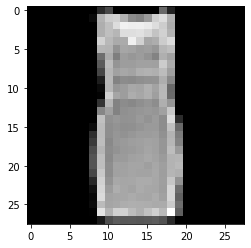

In [21]:
imgPlot = plt.imshow(cnnModel.imgOut, cmap = 'gray')

In [46]:
save_image(cnnModel.imgOut,'tensorImage.png')

In [48]:
import ipywidgets as widgets

In [76]:
file = open('tensorImage.png', 'rb')
image = file.read()
imageWidget = widgets.Image(
    value = image,
    format = 'png',
    width = 400,
    height = 400,
)

buttonLabels = ['t-shirt / top', 
                'pants / \ntrousers', 
                'pullover / \nsweater', 
                'dress', 
                'coat / jacket', 
                'sandal / \nopen-toe', 
                'shirt / \nbutton-up', 
                'sport / \ncasual shoes', 
                'bag / purse', 
                'ankle boots'
               ]

buttons = [widgets.Button(description = labels,
                          layout = widgets.Layout(width = '100px',
                                          height = '50px')) for labels in buttonLabels]

topBox = widgets.HBox([buttons[0], buttons[1], buttons[2], buttons[3], buttons[4]])
botBox = widgets.HBox([buttons[5], buttons[6], buttons[7], buttons[8], buttons[9]])

orderedButtons = widgets.VBox([topBox, botBox])
display(imageWidget, orderedButtons)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x02\x00\x00\x00\xfdoH\xc…